In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/trmyi/Desktop/AI_class/project/house_prediction/'
#https://data.gov.tw/dataset/137371 READ DESCRIPTIONS OF COLUMNS
df = pd.read_csv(path+'housepropertydata_v1.csv')

In [3]:
df.head()

,Unnamed: 0,District,L_area,MainMaterial,B_area,House/Building/Fang,LivingR,BathR,Price,PropertyType2,td,jw
0,0,中和區,12.54,鋼筋混凝土造,89.65,1.0,1.0,2.0,13900000.0,住宅大樓,2,1
1,1,新店區,33.32,鋼筋混凝土造,103.21,3.0,2.0,2.0,5000000.0,公寓,3,1
2,2,中和區,23.11,鋼筋混凝土造,57.60,2.0,1.0,1.0,4500000.0,公寓,1,1
3,5,八里區,19.49,鋼筋混凝土造,120.18,2.0,1.0,1.0,5350000.0,華廈,1,1
4,6,蘆洲區,24.45,鋼筋混凝土造,98.32,3.0,1.0,2.0,9500000.0,公寓,1,1


In [4]:
df.columns

Index(['Unnamed: 0', 'District', 'L_area', 'MainMaterial', 'B_area',
       'House/Building/Fang', 'LivingR', 'BathR', 'Price', 'PropertyType2',
       'td', 'jw'],
      dtype='object')

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.shape

(6237, 11)

In [8]:
# look at numeric and categorical values separately 
df_num = df[['L_area','B_area','House/Building/Fang','LivingR','BathR','td','jw','Price']]
df_cat = df[['District','MainMaterial','PropertyType2']]

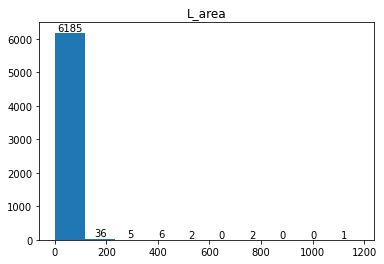

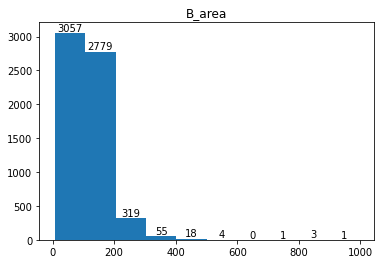

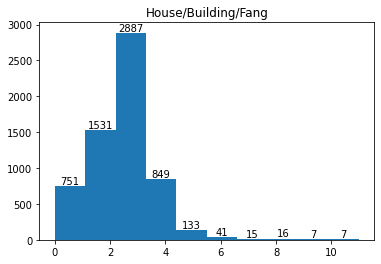

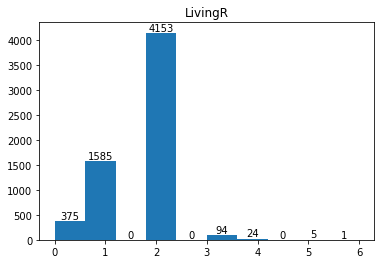

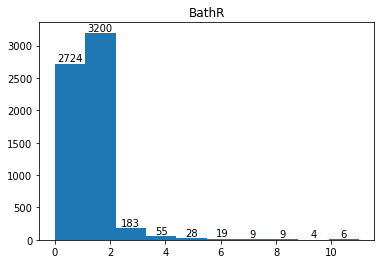

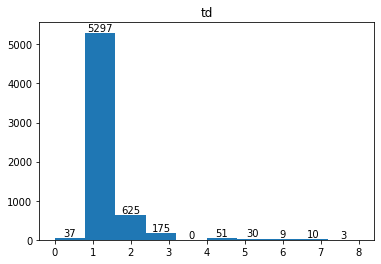

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


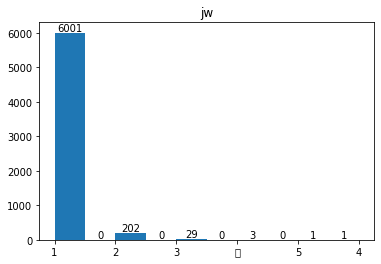

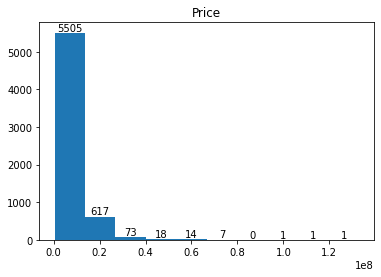

In [21]:
import matplotlib.pyplot as plt

for i in df_num.columns:
    counts, edges, bars = plt.hist(df_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

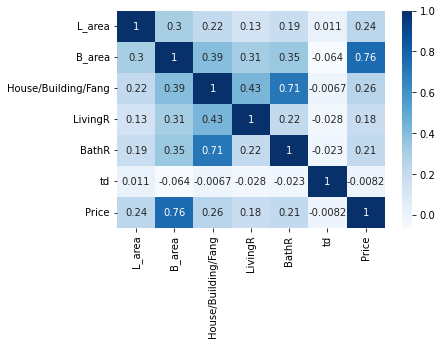

In [22]:
import seaborn as sns


sns.heatmap(df_num.corr(),annot=True, cmap="Blues")
plt.show()

In [33]:
df_num.corr()

,L_area,B_area,House/Building/Fang,LivingR,BathR,td,Price
L_area,1.000000,0.302480,0.215621,0.131106,0.186367,0.011301,0.238572
B_area,0.302480,1.000000,0.393005,0.313341,0.345006,-0.064384,0.760342
House/Building/Fang,0.215621,0.393005,1.000000,0.426726,0.712940,-0.006688,0.255040
LivingR,0.131106,0.313341,0.426726,1.000000,0.217049,-0.027798,0.183057
BathR,0.186367,0.345006,0.712940,0.217049,1.000000,-0.023313,0.214427
td,0.011301,-0.064384,-0.006688,-0.027798,-0.023313,1.000000,-0.008211
Price,0.238572,0.760342,0.255040,0.183057,0.214427,-0.008211,1.000000


In [ ]:
#box plot overallqual/saleprice
#var = 'OverallQual'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#f, ax = plt.subplots(figsize=(8, 6))
#fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);

<AxesSubplot:xlabel='MainMaterial', ylabel='Price'>

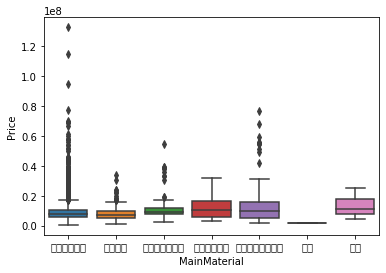

In [26]:
import warnings
warnings.filterwarnings('ignore')

sns.boxplot(x='MainMaterial', y="Price", data=df[['Price','MainMaterial']])

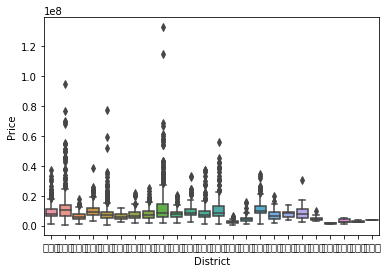

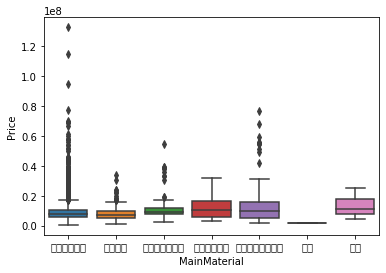

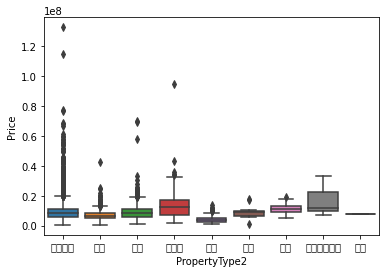

In [29]:
for i in df_cat.columns:
    sns.boxplot(x=i, y="Price", data=df[['Price',i]])
    plt.show()

In [30]:
df['PropertyType2'].value_counts()

住宅大樓      3193
公寓        1754
華廈         954
套房         193
透天厝        111
店面          17
其他          11
辦公商業大樓       3
工廠           1
Name: PropertyType2, dtype: int64

In [34]:
df.columns

Index(['District', 'L_area', 'MainMaterial', 'B_area', 'House/Building/Fang',
       'LivingR', 'BathR', 'Price', 'PropertyType2', 'td', 'jw'],
      dtype='object')

In [44]:
df[df['L_area'] > 600].index

Int64Index([336, 837, 4575], dtype='int64')

In [47]:
df = df.drop(df[df['L_area'] > 600].index)

In [49]:
# look at numeric and categorical values separately 
df_num = df[['L_area','B_area','House/Building/Fang','LivingR','BathR','td','jw','Price']]
df_cat = df[['District','MainMaterial','PropertyType2']]

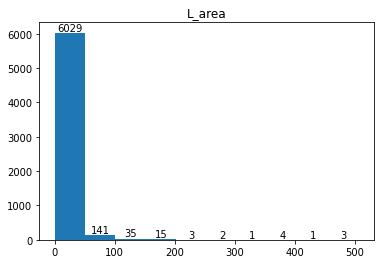

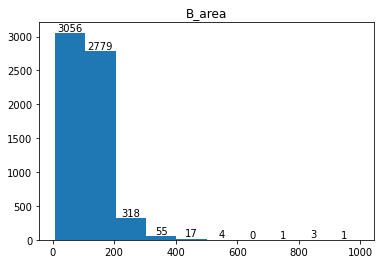

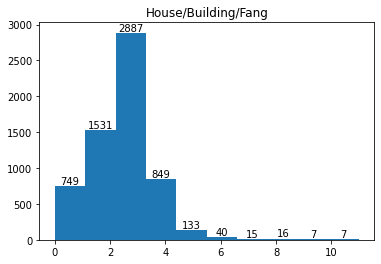

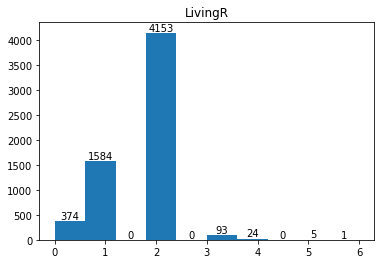

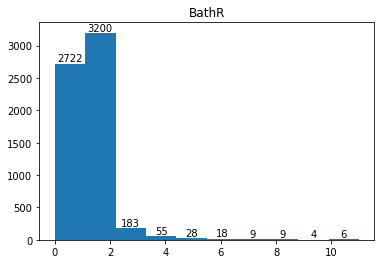

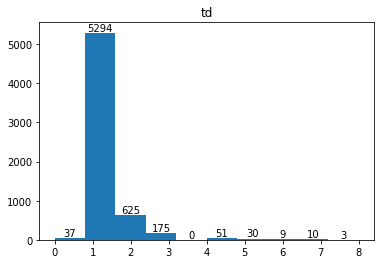

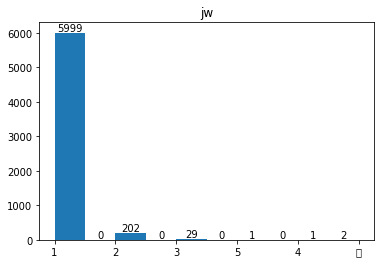

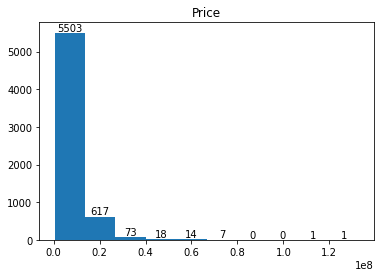

In [50]:
for i in df_num.columns:
    counts, edges, bars = plt.hist(df_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [51]:
df.columns

Index(['District', 'L_area', 'MainMaterial', 'B_area', 'House/Building/Fang',
       'LivingR', 'BathR', 'Price', 'PropertyType2', 'td', 'jw'],
      dtype='object')

In [52]:
df['PropertyType2'].value_counts()

住宅大樓      3193
公寓        1754
華廈         954
套房         192
透天厝        110
店面          17
其他          10
辦公商業大樓       3
工廠           1
Name: PropertyType2, dtype: int64

In [55]:
df[(df['PropertyType2'] == '辦公商業大樓') | (df['PropertyType2'] == '工廠')].index

Int64Index([987, 2538, 2546, 3809], dtype='int64')

In [56]:
df = df.drop(df[(df['PropertyType2'] == '辦公商業大樓') | (df['PropertyType2'] == '工廠')].index)

In [57]:
# look at numeric and categorical values separately 
df_num = df[['L_area','B_area','House/Building/Fang','LivingR','BathR','td','jw','Price']]
df_cat = df[['District','MainMaterial','PropertyType2']]

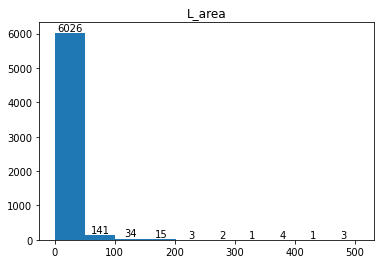

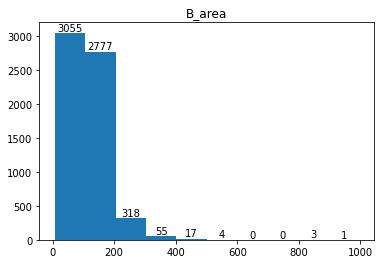

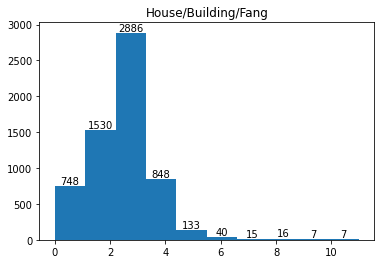

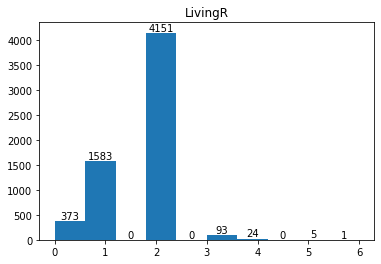

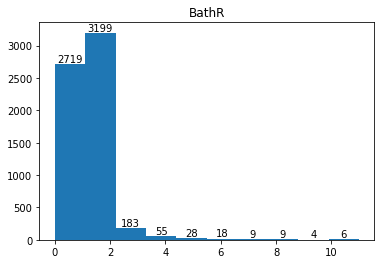

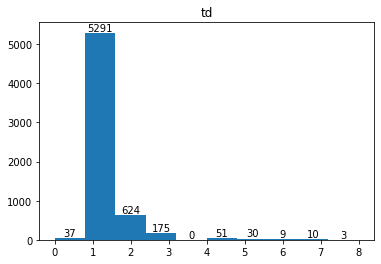

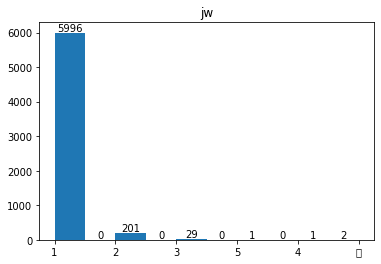

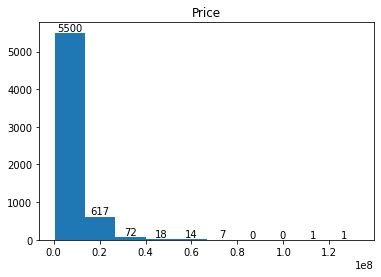

In [58]:
for i in df_num.columns:
    counts, edges, bars = plt.hist(df_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [60]:
df[df['Price']>100000000].index

Int64Index([2909, 3245], dtype='int64')

In [61]:
df = df.drop(df[df['Price']>100000000].index)

In [62]:
# look at numeric and categorical values separately 
df_num = df[['L_area','B_area','House/Building/Fang','LivingR','BathR','td','jw','Price']]
df_cat = df[['District','MainMaterial','PropertyType2']]

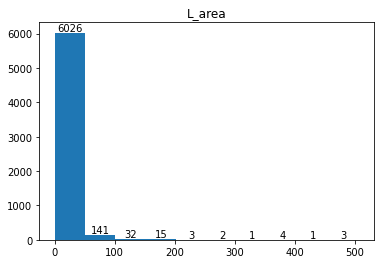

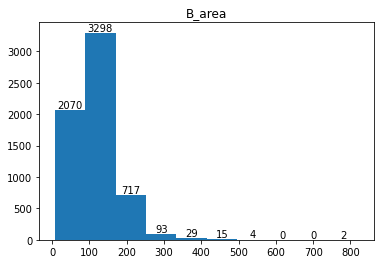

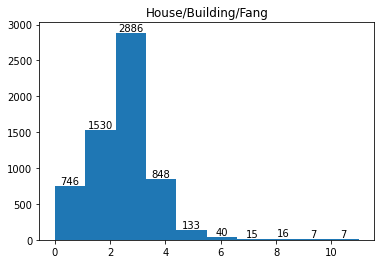

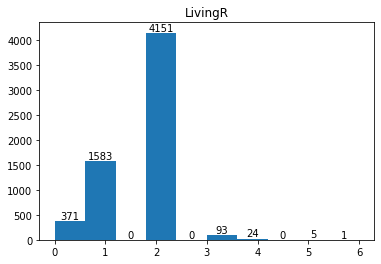

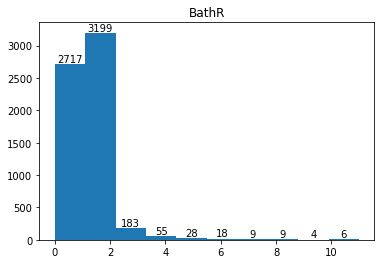

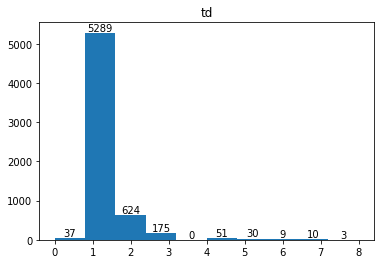

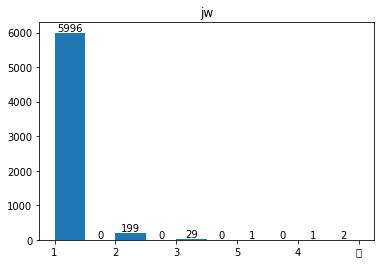

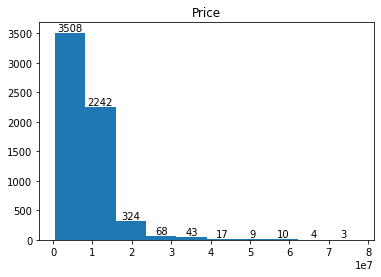

In [63]:
for i in df_num.columns:
    counts, edges, bars = plt.hist(df_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [64]:
df.head()

,District,L_area,MainMaterial,B_area,House/Building/Fang,LivingR,BathR,Price,PropertyType2,td,jw
0,中和區,12.54,鋼筋混凝土造,89.65,1.0,1.0,2.0,13900000.0,住宅大樓,2,1
1,新店區,33.32,鋼筋混凝土造,103.21,3.0,2.0,2.0,5000000.0,公寓,3,1
2,中和區,23.11,鋼筋混凝土造,57.60,2.0,1.0,1.0,4500000.0,公寓,1,1
3,八里區,19.49,鋼筋混凝土造,120.18,2.0,1.0,1.0,5350000.0,華廈,1,1
4,蘆洲區,24.45,鋼筋混凝土造,98.32,3.0,1.0,2.0,9500000.0,公寓,1,1


<AxesSubplot:title={'center':'Log Normal'}, xlabel='Price'>

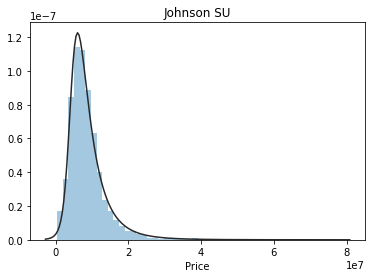

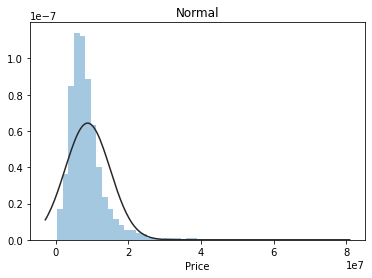

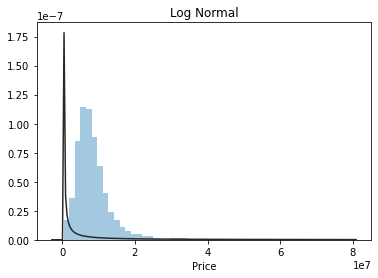

In [65]:
import scipy.stats as st

y = df['Price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

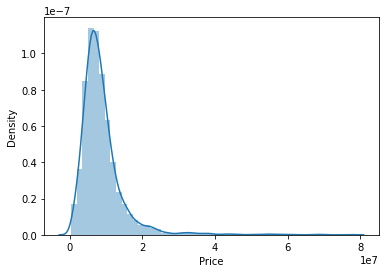

In [67]:
#histogram
sns.distplot(df['Price']);

In [68]:
#skewness and kurtosis
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 3.809919
Kurtosis: 24.638600


In [69]:
df1 = df.copy()

In [73]:
df1[df1['Price']>40000000].index

Int64Index([ 130,  131,  274, 1098, 1180, 1865, 1986, 2474, 2758, 2908, 2993,
            3246, 3247, 3430, 3517, 3717, 3883, 3935, 3936, 4010, 4012, 4394,
            4395, 4566, 4612, 4762, 4955, 5019, 5499, 5538, 5728, 5763, 5764,
            5859, 5860, 5861, 5862, 6023, 6056],
           dtype='int64')

In [74]:
df1 = df1.drop(df1[df1['Price']>40000000].index)

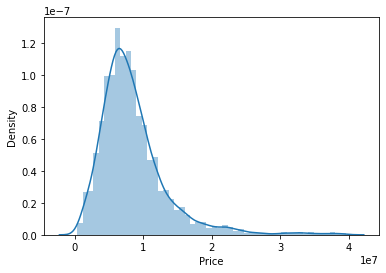

In [75]:
#histogram
sns.distplot(df1['Price']);

In [79]:
#skewness and kurtosis
print("Skewness: %f" % df1['Price'].skew())
print("Kurtosis: %f" % df1['Price'].kurt())

Skewness: 2.079273
Kurtosis: 7.067437


<AxesSubplot:title={'center':'Log Normal'}, xlabel='Price'>

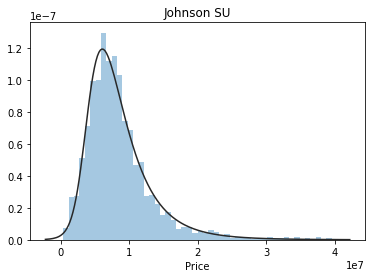

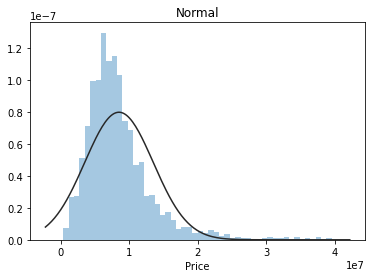

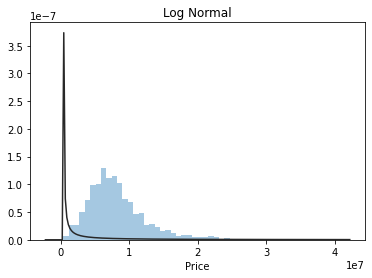

In [80]:
y = df1['Price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

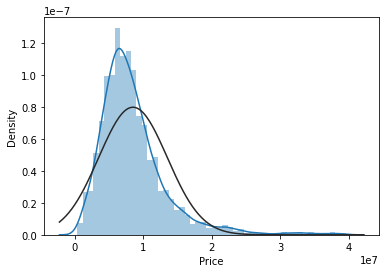

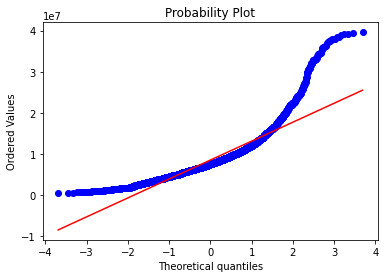

In [83]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats

sns.distplot(df1['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['Price'], plot=plt)

In [85]:
import numpy as np
#applying log transformation
df1['log_Price'] = np.log(df1['Price'])

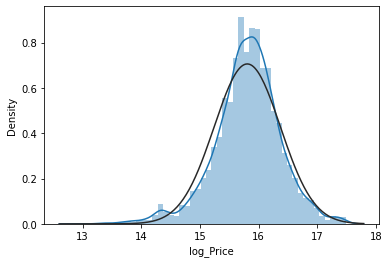

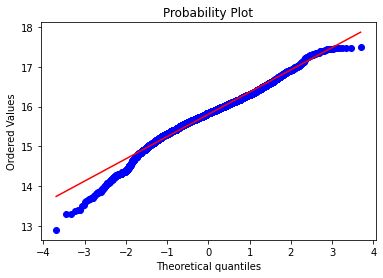

In [86]:
#transformed histogram and normal probability plot
sns.distplot(df1['log_Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['log_Price'], plot=plt)

In [87]:
#skewness and kurtosis
print("Skewness: %f" % df1['log_Price'].skew())
print("Kurtosis: %f" % df1['log_Price'].kurt())

Skewness: -0.442806
Kurtosis: 1.377523


In [88]:
df1.columns

Index(['District', 'L_area', 'MainMaterial', 'B_area', 'House/Building/Fang',
       'LivingR', 'BathR', 'Price', 'PropertyType2', 'td', 'jw', 'log_Price'],
      dtype='object')

In [89]:
df_num.columns

Index(['L_area', 'B_area', 'House/Building/Fang', 'LivingR', 'BathR', 'td',
       'jw', 'Price'],
      dtype='object')

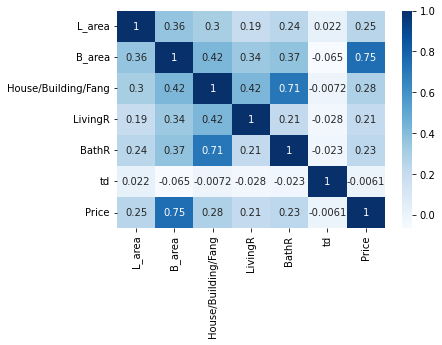

In [90]:
sns.heatmap(df_num.corr(),annot=True, cmap="Blues")
plt.show()

In [91]:
col_to_del = ['L_area','td','jw','House/Building/Fang']

In [93]:
df1 = df1.drop(columns=col_to_del)

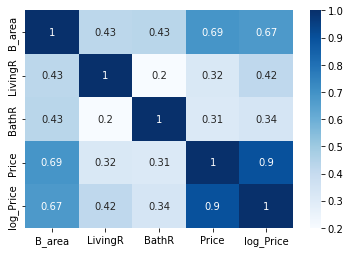

In [98]:
sns.heatmap(df1.corr(),annot=True, cmap="Blues")
plt.show()

In [100]:
df1.columns

Index(['District', 'MainMaterial', 'B_area', 'LivingR', 'BathR', 'Price',
       'PropertyType2', 'log_Price'],
      dtype='object')

In [101]:
df1.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       6189 non-null   object 
 1   MainMaterial   6189 non-null   object 
 2   B_area         6189 non-null   float64
 3   LivingR        6189 non-null   float64
 4   BathR          6189 non-null   float64
 5   Price          6189 non-null   float64
 6   PropertyType2  6189 non-null   object 
 7   log_Price      6189 non-null   float64
dtypes: float64(5), object(3)
memory usage: 435.2+ KB


In [109]:
df1.isnull().sum()

District         0
MainMaterial     0
B_area           0
LivingR          0
BathR            0
Price            0
PropertyType2    0
log_Price        0
dtype: int64

In [111]:
df1.LivingR = df1.LivingR.astype(int)
df1.BathR = df1.BathR.astype(int)

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       6189 non-null   object 
 1   MainMaterial   6189 non-null   object 
 2   B_area         6189 non-null   float64
 3   LivingR        6189 non-null   int32  
 4   BathR          6189 non-null   int32  
 5   Price          6189 non-null   float64
 6   PropertyType2  6189 non-null   object 
 7   log_Price      6189 non-null   float64
dtypes: float64(3), int32(2), object(3)
memory usage: 386.8+ KB


In [114]:
df1_dummies = pd.get_dummies(df1)
df1_dummies.head()

,B_area,LivingR,BathR,Price,log_Price,District_三峽區,District_三芝區,District_三重區,District_中和區,District_五股區,...,MainMaterial_鋼筋混凝土造,MainMaterial_鋼骨混凝土造,MainMaterial_鋼骨鋼筋混凝土造,PropertyType2_住宅大樓,PropertyType2_公寓,PropertyType2_其他,PropertyType2_套房,PropertyType2_店面,PropertyType2_華廈,PropertyType2_透天厝
0,89.65,1,2,13900000.0,16.447399,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,103.21,2,2,5000000.0,15.424948,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,57.60,1,1,4500000.0,15.319588,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,120.18,1,1,5350000.0,15.492607,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,98.32,1,2,9500000.0,16.066802,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [115]:
df1_dummies.columns

Index(['B_area', 'LivingR', 'BathR', 'Price', 'log_Price', 'District_三峽區',
       'District_三芝區', 'District_三重區', 'District_中和區', 'District_五股區',
       'District_八里區', 'District_土城區', 'District_新店區', 'District_新莊區',
       'District_板橋區', 'District_林口區', 'District_樹林區', 'District_永和區',
       'District_汐止區', 'District_泰山區', 'District_淡水區', 'District_深坑區',
       'District_瑞芳區', 'District_石門區', 'District_萬里區', 'District_蘆洲區',
       'District_金山區', 'District_雙溪區', 'District_鶯歌區', 'MainMaterial_加強磚造',
       'MainMaterial_土造', 'MainMaterial_磚造', 'MainMaterial_見其他登記事項',
       'MainMaterial_鋼筋混凝土造', 'MainMaterial_鋼骨混凝土造', 'MainMaterial_鋼骨鋼筋混凝土造',
       'PropertyType2_住宅大樓', 'PropertyType2_公寓', 'PropertyType2_其他',
       'PropertyType2_套房', 'PropertyType2_店面', 'PropertyType2_華廈',
       'PropertyType2_透天厝'],
      dtype='object')

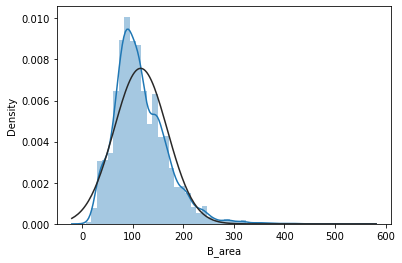

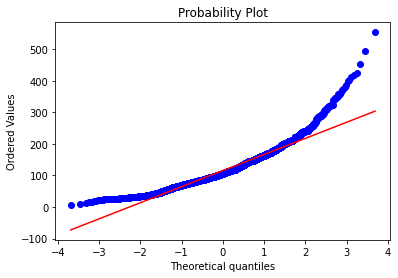

In [117]:
sns.distplot(df1['B_area'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['B_area'], plot=plt)

In [120]:
#skewness and kurtosis
print("Skewness: %f" % df1['B_area'].skew())
print("Kurtosis: %f" % df1['B_area'].kurt())

Skewness: 1.241209
Kurtosis: 3.541196


In [118]:
#applying log transformation
df1['log_B_area'] = np.log(df1['B_area'])

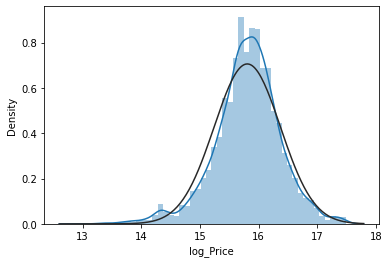

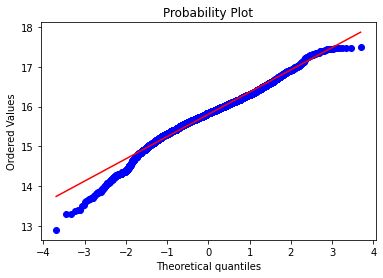

In [119]:
#transformed histogram and normal probability plot
sns.distplot(df1['log_Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['log_Price'], plot=plt)

In [121]:
#skewness and kurtosis
print("Skewness: %f" % df1['log_B_area'].skew())
print("Kurtosis: %f" % df1['log_B_area'].kurt())

Skewness: -0.492640
Kurtosis: 0.765208


In [122]:
df1.columns

Index(['District', 'MainMaterial', 'B_area', 'LivingR', 'BathR', 'Price',
       'PropertyType2', 'log_Price', 'log_B_area'],
      dtype='object')

In [123]:
df1.to_csv('housepropertydata_v2.csv')